## 번역의 흐름

### 규칙 기반 기계 번역
잠시 한영 번역가가 되었다고 생각해 봅시다. 나는이라는 어절을 어떻게 번역할 수 있을까요? 아마 백이면 백 I am 또는 I'm 이라고 번역을 할 겁니다. 그렇다면 너는은 어떻죠? You am이라고 번역하실 분은 설마 없겠죠? You are이나 You're로 번역하는 것이 맞습니다!  
  
나 + 는과 너 + 는 모두 는을 포함하는데, 영문에서는 는 이 am 과 are로 나뉘는 것을 알 수 있습니다. 그러니 는 = am 이라고 정의할 수도, 는 = are 이라고 정의할 수도 없죠. 먼저 등장하는 단어가 나 인지 너 인지에 따라 분기를 나눠줘야 하는 거예요.  
  
이처럼 번역할 때 경우의 수를 직접 정의해 주는 방식이 규칙 기반 기계 번역(RBMT, Rule-Based Machine Translation) 입니다. 이 수많은 규칙들은 모두 언어학을 기반으로 하기 때문에, 개발 과정에 언어학자가 동반되어야만 했어요.  
  
예상하셨겠지만 규칙 기반 기계 번역은 한계가 명확합니다. 규칙에 없는 문장이 들어올 경우 번역이 불가능하고 유연성이 떨어지며, 무엇보다 모든 규칙을 정의하는 과정이 너무나도 복잡하고 오랜 시간이 필요 합니다. 더 편하게, 유연하게 번역을 해낼 수는 없을까요?

### 통계적 기계 번역
단점이 명확한 규칙 기반 기계 번역을 개선하고자 하는 시도는 당연히 존재했으며, 아무래도 그것은 직접 구현해 본 쪽이 유리했나 봅니다. 1988년에 IBM이 Model 1을 통해 새로운 번역 방식을 선보였죠. 수많은 데이터로부터 통계적 확률을 구해 번역을 진행하는 통계적 기계 번역(SMT, Statistical Machine Translation) 이 바로 그것입니다.  
  통계적 모델은 각 단어가 나올 확률을 계산해 문장을 만들어냅니다. 식은 다음과 같습니다.

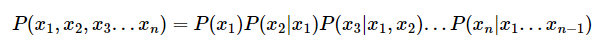

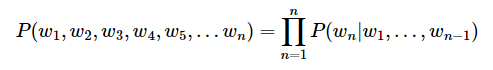

"문장이 존재할 확률을 측정한다." 뭔가 멋진 개념을 담은 언어 모델이죠? 통계적 언어 모델을 활용한 SMT는 과연 어떻게 동작하는 걸까요? 번역은 자연스러운 문장을 생성하는 것뿐만 아니라 번역문의 문법 구조도 고려해야 하기 때문에 단순히 P(Target | Source) 만을 고려해서는 안 된답니다. 원문과 번역문, 각 단어 간의 매핑 관계를 추가로 고려해야 하는데, 그 관계를 정렬(Alignment) 이라고 부릅니다.

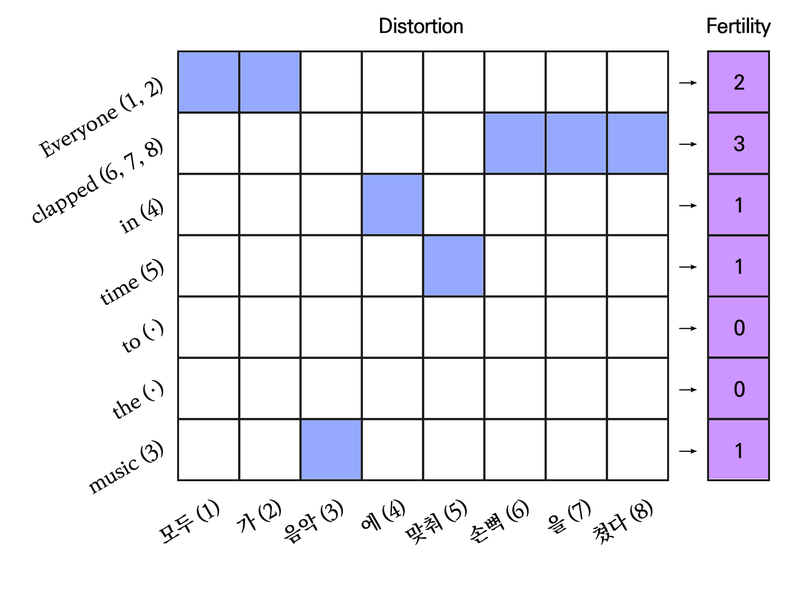

정렬에는 퍼틸리티(Fertility) 와 왜곡(Distortion), 두 가지 요소가 포함됩니다.  
  
퍼틸리티는 원문의 각 단어가 번역 후에 몇 개의 단어로 나타나는지를 의미하는 값입니다. 위의 예에서는  Everyone의 퍼틸리티는 2이고, Clapped 의 퍼틸리티는 3입니다.  퍼틸리티에 대한 확률은 p(n|w) 로 정의되며 n은 퍼틸리티 값, w는 원문의 단어입니다. music 은 높은 확률로 음악 으로만 번역될 테니 p(1|music) = 0.9 정도로 표현할 수 있습니다.  
  
왜곡은 원문의 단어가 번역문에서 존재하는 위치를 나타냅니다. 위에서 Clapped의 경우 손뼉(6) 을(7) 쳤다(8)로 번역될 수 있기에 (6,7,8)로 나타납니다.  왜곡에 대한 확률은 p(t|s, l) 로 정의되며 t은 번역문에서 각 단어의 위치, s는 원문에서 각 단어의 위치, 그리고 l은 번역문의 길이입니다. Everyone(1) 으로 시작하는 문장은 모두(1) / 가(2) 라고 번역될 확률이 높으며 p(1|1, 8) x p(2|1, 8) 계산된 확률 또한 높습니다.